# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fakhran al anshari
- **Email:** fakhranalanshari3@gmail.com
- **ID Dicoding:** Fakhran Al Anshari M012B4KY1378


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh waktu terhadap penggunaan sepeda pada workingday, holiday, dan weekday?
- Bagaimana perbandingan antara jumlah pengguna sepeda terdaftar (registered) dan pengguna biasa (casual) selama beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [164]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [165]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data yang digunakan dalam proses analisis ini adalah data yang terdiri dari dua tabel utama, yaitu hour dan day. Yang masing - masing memuat beberapa informasi mengenai penggunaan sepeda berdasarkan hari dan jam.
- tabel hour adalah tabel data penggunaan sepeda yang memuat informasi lebih detail terkait penggunaan sepeda, seperti pada waktu apa saja penggunaan sepeda melonjak.
- tabel day adalah tabel data penggunaan sepeda yang memuat informasi penggunaan harian sepeda, serta faktor - faktor seperti cuaca, suhu, dan hari dalam seminggu yang memungkinkan analisis penggunaan.

### Assessing Data

Menilai data hour_df

In [166]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [167]:
print("Jumlah duplikasi :", hour_df.duplicated().sum())

Jumlah duplikasi : 0


In [168]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Menilai data day_df

In [169]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [170]:
print("Jumlah Duplikasi :", day_df.duplicated().sum())

Jumlah Duplikasi : 0


In [171]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- jumlah data pada hour_df dan day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).
- Data hour_df dan day_df tidak memiliki duplikat, artinya kedua dataset tersebut tidak mengandung nilai yang sama atau ganda.
- Setelah melakukan pemeriksaan parameter statistik pada kedua dataset tersebut, tidak ditemukan keanehan yang menandakan bahwa data hour_df dan day_df tidak mengandung nilai yang tidak akurat(inaccurate value).

### Cleaning Data

Membersihkan Data hour_df

In [172]:
#Mengubah beberapa nama kolom agar lebih jelas dan mudah dibaca
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hum':'humidity'
}, inplace=True)


In [173]:
#Mengubah tipe data 'dateday' mendadi datetime
datetime_column = 'dateday'
hour_df[datetime_column] = pd.to_datetime(hour_df[datetime_column])

Membersihkan Data day_df

In [174]:
#Mengubah beberapa nama kolom agar lebih jelas dan mudah dibaca
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count',
    'hum':'humidity'
}, inplace=True)


In [175]:
#Mengubah tipe data 'dteday' mendadi datetime
datetime_column = 'dateday'
day_df[datetime_column] = pd.to_datetime(hour_df[datetime_column])

In [176]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [177]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Pada tahap cleaning data, dilakukan modifikasi pada nama-nama kolom yang kurang jelas agar lebih mudah untuk dipahami.
- Tipe data kolom 'dateday' diubah dari objek (object) menjadi datetime agar data dapat digunakan untuk analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi hour_df

In [178]:
hour_df.describe(include="all")

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [179]:
# Mengelompokkan data berdasarkan atribut 'weekday'
hour_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean']
})

count                
          max min        mean
weekday                      
0         776   1  177.468825
1         968   1  183.744655
2         970   1  191.238891
3         977   1  191.130505
4         976   1  196.436665
5         957   1  196.135907
6         783   1  190.209793

In [180]:
# Mengelompokkan data berdasarkan atribut 'holiday'
hour_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean']
})

count               
          max min       mean
holiday                     
0         977   1  190.42858
1         712   1  156.87000

In [181]:
# Mengelompokkan data berdasarkan atribut 'workingday'
hour_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                
             max min        mean
workingday                      
0            783   1  181.405332
1            977   1  193.207754

Eksplorasi day_df

In [182]:
day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [183]:

# Ubah kolom 'dateday' menjadi datetime
day_df['dateday'] = pd.to_datetime(day_df['dateday'])

# Filter untuk bulan
filtered_df = day_df[day_df['dateday'].dt.month.isin([1, 2, 3, 4, 5, 6, 7])]

# Ambil kolom yang diinginkan
results = filtered_df[['dateday', 'holiday', 'weekday', 'workingday']]

# Tampilkan hasil
print(results)


       dateday  holiday  weekday  workingday
0   2011-01-01        0        6           0
1   2011-01-01        0        0           0
2   2011-01-01        0        1           1
3   2011-01-01        0        2           1
4   2011-01-01        0        3           1
..         ...      ...      ...         ...
726 2011-02-02        0        4           1
727 2011-02-02        0        5           1
728 2011-02-02        0        6           0
729 2011-02-02        0        0           0
730 2011-02-02        0        1           1

[731 rows x 4 columns]


In [184]:
day_df['dateday'] = pd.to_datetime(day_df['dateday'])  # memastikan 'dteday' sebagai datetime
day_df.set_index('dateday', inplace=True)  # set dteday sebagai index

# Menghitung nilai maksimum bulanan untuk kolom 'registered' dan 'casual'
monthly_max = day_df.resample('M').agg({
    "registered": "max",
    "casual": "max"
})

# Menampilkan hasil
print(monthly_max)


            registered  casual
dateday                       
2011-01-31        6946    3410
2011-02-28        6055    1603


**Insight:**
- Data menunjukkan bahwa jumlah penggunaan sepeda bervariasi pada workingday, weekday, dan holiday sepanjang beberapa bulan. Selain itu, dapat dilihat bahwa persentase penggunaan sepeda paling tinggi terjadi pada workingday. Ini menunjukkan bahwa penggunaan sepeda lebih sering terjadi pada workingday dibandingkan dengan holiday maupun wekday.
- Setelah dilakukan analisis lebih lanjut terhadap hari biasa (weekday), dapat disimpulkan bahwa penggunaan sepeda tertinggi terjadi pada hari Selasa.
- Terdapat perbedaan yang signifikan antara pengguna registered dan casual. Pengguna registered memiliki jumlah yang jauh lebih banyak dibandingkan dengan pengguna casual, terutama jika ditinjau dari penggunaan maksimum di antara keduanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh waktu workingday, holiday, dan weekday terhadap penggunaan sepeda ?

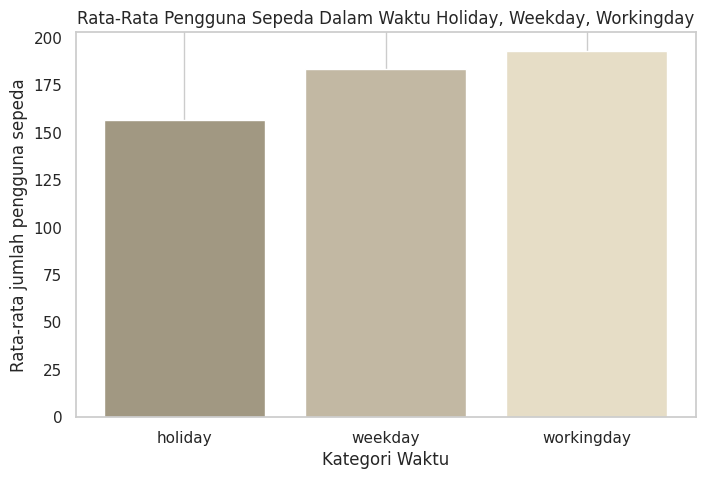

In [185]:
# Menghitung rata-rata pengguna sepeda berdasarkan kategori waktu
avg_holiday = hour_df[hour_df['holiday'] == 1]['count'].mean()  # Rata-rata saat hari libur
avg_weekday = hour_df[hour_df['weekday'] == 1]['count'].mean()  # Rata-rata saat hari biasa
avg_workingday = hour_df[hour_df['workingday'] == 1]['count'].mean()  # Rata-rata saat hari kerja

categories = ['holiday', 'weekday', 'workingday']
avg_counts = [avg_holiday, avg_weekday, avg_workingday]

plt.figure(figsize=(8,5))
plt.bar(categories, avg_counts, color=['#A19882', '#C2B8A3', '#E6DDC6'])
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata jumlah pengguna sepeda')  # Perbaikan plt.ylabel
plt.title('Rata-Rata Pengguna Sepeda Dalam Waktu Holiday, Weekday, Workingday')
plt.grid(axis='y')
plt.show()

### Pertanyaan 2:

In [186]:
Bagaimana perbandingan antara jumlah pengguna sepeda terdaftar (registered) dan pengguna biasa (casual) selama beberapa tahun terakhir?


Object `terakhir` not found.


<ipython-input-187-5d3b796688f3>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])


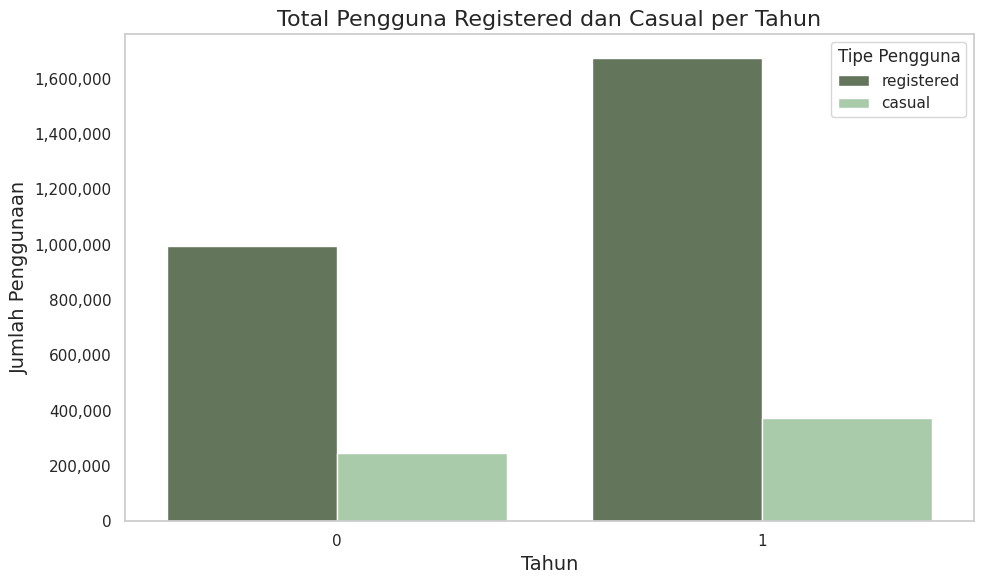

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mengelompokkan data berdasarkan tahun dan menjumlahkan pengguna registered dan casual
total_users = day_df.groupby(by='year').agg({'registered': 'sum', 'casual': 'sum'}).reset_index()

# Mengubah data ke format long dengan pd.melt untuk visualisasi yang lebih mudah
total_users = pd.melt(total_users, id_vars='year', value_vars=['registered', 'casual'],
                      var_name='User Type', value_name='Count')

plt.figure(figsize=(10, 6))

# Custom colors for registered and casual users
custom_colors = ['#617A55', '#A4D0A4']  # Red for 'casual', Blue for 'registered'

# Membuat barplot untuk membandingkan jumlah pengguna registered dan casual per tahun
sns.barplot(x='year', y='Count', hue='User Type', data=total_users, palette=custom_colors)

# Menambahkan judul dan label sumbu
plt.title('Total Pengguna Registered dan Casual per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Penggunaan', fontsize=14)

# Menambahkan legenda untuk membedakan antara pengguna registered dan casual
plt.legend(title='Tipe Pengguna')

# Menambahkan grid pada sumbu y untuk membantu interpretasi data
plt.grid(axis='y')

# Mengubah tampilan nilai sumbu Y menjadi bilangan bulat tanpa koma
y_ticks = plt.gca().get_yticks().astype(int)
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Mengatur layout agar lebih rapi
plt.tight_layout()

# Menampilkan plot
plt.show()


# Pertanyaan 3


- Bagaimana kondisi cuaca (weathersit) memengaruhi jumlah pengguna sepeda baik secara harian maupun per jam?

<ipython-input-188-7e822923f3f0>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_data, x='weathersit', y='cnt', ci=None, palette='viridis')
<ipython-input-188-7e822923f3f0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_data, x='weathersit', y='cnt', ci=None, palette='viridis')


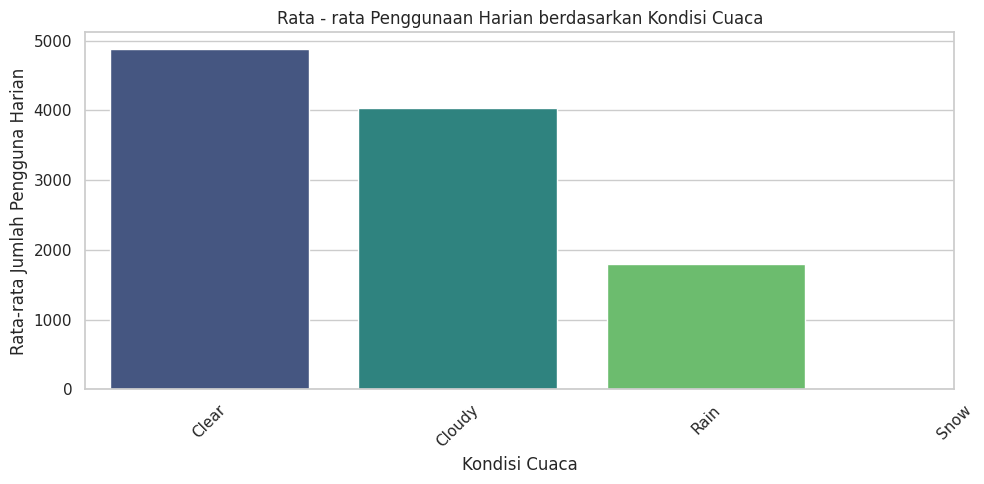

<ipython-input-188-7e822923f3f0>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_data, x='weathersit', y='cnt', ci=None, palette='viridis')
<ipython-input-188-7e822923f3f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_data, x='weathersit', y='cnt', ci=None, palette='viridis')


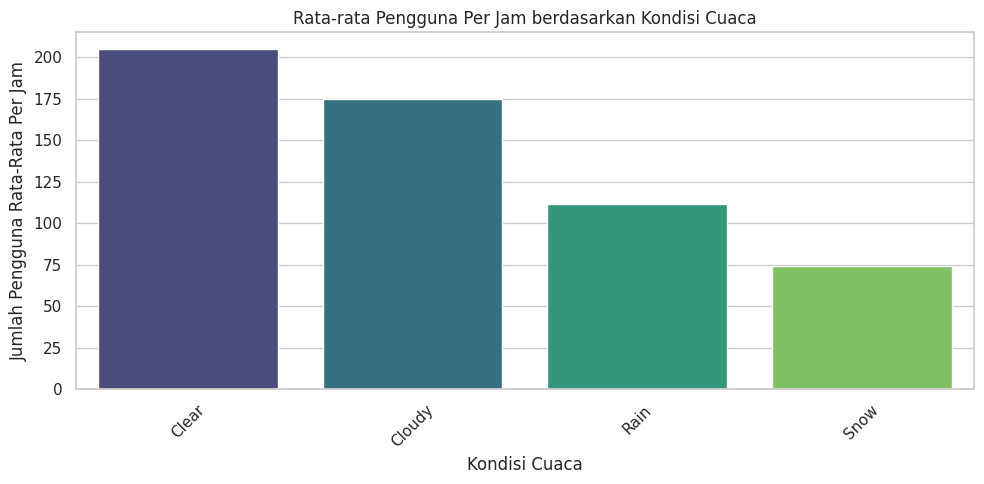

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the uploaded files
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# Visualize the average number of users per weather condition for daily data
plt.figure(figsize=(10, 5))
sns.barplot(data=day_data, x='weathersit', y='cnt', ci=None, palette='viridis')
plt.title('Rata - rata Penggunaan Harian berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Harian')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Snow'], rotation=45)
plt.tight_layout()
plt.show()

# Visualize the average number of users per weather condition for hourly data
plt.figure(figsize=(10, 5))
sns.barplot(data=hour_data, x='weathersit', y='cnt', ci=None, palette='viridis')
plt.title('Rata-rata Pengguna Per Jam berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Rata-Rata Per Jam')
plt.xticks([0, 1, 2, 3], ['Clear', 'Cloudy', 'Rain', 'Snow'], rotation=45)
plt.tight_layout()
plt.show()


**Insight:**
- Berdasarkan visualisasi rata-rata penggunaan sepeda berdasarkan waktu holiday, weekday, dan workingday. terlihat bahwa penggunaan tertinggi terjadi saat workingday dengan rata-rata penggunaan sekitar 190 jam, sedangkan penggunaan terendah terjadi pada waktu holiday dengan penggunaan rata-rata sekitar 150 jam.
- Berdasarkan hasil visualisasi, terlihat bahwa jumlah pengguna terdaftar (registered) jauh lebih besar dibandingkan dengan jumlah pengguna biasa (casual). Pada tahun 2011 dan 2012, terdapat peningkatan yang signifikan dalam jumlah pengguna terdaftar (registered), sementara peningkatan jumlah pengguna biasa (casual) relatif lebih kecil
- Berdasarkan hasil visualisasi rata-rata penggunaan sepeda berdasarkan kondisi cuaca, terlihat bahwa pada visualisasi per hari dan per jam, jumlah penggunaan sepeda tertinggi terjadi saat cuaca cerah (clear), dibandingkan dengan kondisi cuaca lainnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan analisis visualisasi rata-rata penggunaan sepeda yang dikelompokkan berdasarkan waktu holiday, weekday, dan workingday, dapat dilihat bahwa pola penggunaan sepeda berbeda secara signifikan tergantung pada jenis harinya. Penggunaan tertinggi tercatat pada workingday, dengan rata - rata penggunaan mencapai sekitar 190 jam. Ini menunjukkan bahwa selama hari kerja, pengguna sepeda cenderung lebih aktif, mungkin karena faktor - faktor seperti kebutuhan untuk bepergian ke tempat kerja atau aktivitas sehari - hari lainnya.
- Conclution pertanyaan 2 : Berdasarkan hasil visualisasi, terlihat bahwa jumlah pengguna terdaftar (registered) secara konsisten lebih tinggi dibandingkan dengan jumlah pengguna biasa (casual) baik pada tahun 2011 maupun 2012. Pada tahun 2012, terjadi peningkatan signifikan dalam jumlah pengguna terdaftar, yang menunjukkan bahwa lebih banyak orang memilih untuk mendaftar dan menggunakan sepeda secara rutin. Rata - rata peningkatan pengguna terdaftar di tahun ini lebih tinggi dibandingkan dengan peningkatan pengguna biasa.Meskipun jumlah pengguna biasa juga meningkat pada tahun 2012, peningkatannya tidak sebesar pengguna terdaftar, menunjukkan bahwa penggunaan sepeda secara rutin oleh pengguna terdaftar masih menjadi pendorong utama pertumbuhan penggunaan sepeda secara keseluruhan.
- Conclution pertanyaan 3 : Berdasarkan hasil visualisasi rata - rata penggunaan sepeda berdasarkan kondisi cuaca, terlihat bahwa baik pada visualisasi per hari maupun per jam, jumlah penggunaan sepeda tertinggi terjadi saat cuaca cerah (clear). Pengguna sepeda cenderung lebih banyak beraktivitas ketika cuaca mendukung. Saat cuaca berawan (cloudy), penggunaan sepeda masih cukup tinggi, meskipun sedikit menurun dibandingkan saat cuaca cerah. Namun, jumlah penggunaan sepeda menurun lebih tajam ketika cuaca berubah menjadi hujan (rain), dan menjadi yang terendah saat kondisi bersalju (snow). Hal ini menunjukkan bahwa cuaca yang kurang bersahabat, seperti hujan dan salju, dapat menjadi faktor penghambat bagi pengguna sepeda, sedangkan cuaca cerah cenderung mendorong lebih banyak orang untuk bersepeda, baik untuk keperluan transportasi maupun rekreasi.